<a href="https://colab.research.google.com/github/taka-sigure/AI_Datascience_Intern/blob/main/test_jitsuryoku02_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#実力テスト
本レポートは以下の構成です。  

- イントロダクションパート
- メインパート
- まとめパート  

##イントロダクションパート

イントロダクションは以下の内容について記載する。  

1. 課題の内容
2. 分析で使用するデータ
3. モデル作成時に工夫した点

### 1. 課題の内容
ダイレクトマーケティングの効率改善。<br>
具体的には、どの顧客が定期預金を申し込むかを予測する（success, fail）モデルの作成。

### 2. 今回使用するデータ
分析には、以下のデータを使用する。   

* 訓練・検証用のデータセット：bank_train.csv<br>
* テスト用のデータセット：bank_test.csv<br>
* 推論用データセット：bank_pred.csv<br>

それぞれ、(6416,12),(15000,12),(10000,12)のデータセットである。



### 3. モデル作成時に工夫した点 
* 欠損値を全て補完したこと
* 重複値を削除せず、モデルを作成したこと
* いろいろなモデルを試し、結局ロジスティクス回帰を採用したこと

## メインパート

メインパートでは、以下について記載する。  

1. 前処理
2. 探索的データ分析  
3. モデルの作成  
4. モデルから予測する

In [ ]:
# 必要なモジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 15, 15

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_test02.csv')
pred = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_pred.csv')
data = pd.concat([train, test], sort=False)
result_mapping = {'success':1, 'fail':0}
train['result'] = train['result'].map(result_mapping)
test['result'] = test['result'].map(result_mapping)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        6326 non-null   float64
 1   job        6413 non-null   object 
 2   marital    6327 non-null   object 
 3   education  6416 non-null   object 
 4   default    6387 non-null   object 
 5   balance    6416 non-null   int64  
 6   housing    6355 non-null   object 
 7   loan       6199 non-null   object 
 8   pdays      6380 non-null   float64
 9   previous   6416 non-null   int64  
 10  poutcome   6166 non-null   object 
 11  result     6416 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 601.6+ KB


In [ ]:
train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
count,6326.000000,6413,6327,6416,6387,6416.000000,6355,6199,6380.000000,6416.000000,6166,6416.000000
unique,NaN,12,3,4,2,NaN,2,2,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,NaN,unknown,NaN
freq,NaN,1438,3839,3295,6261,NaN,3499,5174,NaN,NaN,4998,NaN
mean,40.980398,NaN,NaN,NaN,NaN,1329.536160,NaN,NaN,39.616458,0.573410,NaN,0.114246
std,10.612138,NaN,NaN,NaN,NaN,2711.424072,NaN,NaN,97.745220,1.955045,NaN,0.318134
min,18.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,-1.000000,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,-1.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,473.000000,NaN,NaN,-1.000000,0.000000,NaN,0.000000
75%,49.000000,NaN,NaN,NaN,NaN,1463.250000,NaN,NaN,-1.000000,0.000000,NaN,0.000000


###前処理

####欠損値処理

In [ ]:
train.isnull().sum()

age           90
job            3
marital       89
education      0
default       29
balance        0
housing       61
loan         217
pdays         36
previous       0
poutcome     250
result         0
dtype: int64

In [ ]:
#欠損値の補完を一気に行う
train['age'].fillna(np.mean(train['age']), inplace=True)
train.fillna({'job':train['job'].mode()[0]}, inplace=True)
train.fillna({'marital':train['marital'].mode()[0]}, inplace=True)
train.fillna({'default':train['default'].mode()[0]}, inplace=True)
train.fillna({'housing':train['housing'].mode()[0]}, inplace=True)
train.fillna({'loan':train['loan'].mode()[0]}, inplace=True)
train['pdays'].fillna(np.mean(train['pdays']), inplace=True)
train.fillna({'poutcome':train['poutcome'].mode()[0]}, inplace=True)

In [ ]:
test.isnull().sum()

age           35
job            8
marital       45
education      0
default       62
balance        0
housing      114
loan          24
pdays         79
previous       0
poutcome     152
result         0
dtype: int64

In [ ]:
#欠損値の補完を一気に行う
test['age'].fillna(np.mean(test['age']), inplace=True)
test.fillna({'job':test['job'].mode()[0]}, inplace=True)
test.fillna({'marital':test['marital'].mode()[0]}, inplace=True)
test.fillna({'default':test['default'].mode()[0]}, inplace=True)
test.fillna({'housing':test['housing'].mode()[0]}, inplace=True)
test.fillna({'loan':test['loan'].mode()[0]}, inplace=True)
test['pdays'].fillna(np.mean(test['pdays']), inplace=True)
test.fillna({'poutcome':test['poutcome'].mode()[0]}, inplace=True)

In [ ]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

In [ ]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        6416 non-null   float64
 1   job        6416 non-null   object 
 2   marital    6416 non-null   object 
 3   education  6416 non-null   object 
 4   default    6416 non-null   object 
 5   balance    6416 non-null   int64  
 6   housing    6416 non-null   object 
 7   loan       6416 non-null   object 
 8   pdays      6416 non-null   float64
 9   previous   6416 non-null   int64  
 10  poutcome   6416 non-null   object 
 11  result     6416 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 601.6+ KB


In [ ]:
train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
count,6416.000000,6416,6416,6416,6416,6416.000000,6416,6416,6416.000000,6416.000000,6416,6416.000000
unique,NaN,12,3,4,2,NaN,2,2,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,NaN,unknown,NaN
freq,NaN,1441,3928,3295,6290,NaN,3560,5391,NaN,NaN,5248,NaN
mean,40.980398,NaN,NaN,NaN,NaN,1329.536160,NaN,NaN,39.616458,0.573410,NaN,0.114246
std,10.537433,NaN,NaN,NaN,NaN,2711.424072,NaN,NaN,97.470568,1.955045,NaN,0.318134
min,18.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,-1.000000,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,-1.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,473.000000,NaN,NaN,-1.000000,0.000000,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1463.250000,NaN,NaN,-1.000000,0.000000,NaN,0.000000


####特徴量変換

In [ ]:
#obj型変数のみ取り出す
train_obj = train.select_dtypes(include='object')
train_obj_num = train_obj.nunique()

In [ ]:
#2値のデータには、ラベルエンコーディングを行う
train_cols = train_obj_num[train_obj_num==2].index
from sklearn.preprocessing import LabelEncoder
for col in train_cols:
  le = LabelEncoder()
  le.fit(train[col])
  train[col] = le.transform(train[col])

In [ ]:
#残りの変数には、ワンホットエンコーディングを行う
train_ = pd.get_dummies(train, drop_first=True)
train_

,age,default,balance,housing,loan,pdays,previous,result,job_blue-collar,job_entrepreneur,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,50.0,0,1857,0,1,-1.0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,37.0,0,363,1,0,-1.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,35.0,0,422,1,0,-1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,55.0,0,119,0,1,-1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,40.0,0,1066,1,0,-1.0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,28.0,0,153,0,0,-1.0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
6412,33.0,0,403,1,0,-1.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6413,42.0,0,3,1,0,-1.0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
6414,27.0,0,390,0,0,104.0,2,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
#obj型変数のみ取り出す
test_obj = test.select_dtypes(include='object')
test_obj_num = test_obj.nunique()

In [ ]:
#2値のデータには、ラベルエンコーディングを行う
test_cols = test_obj_num[test_obj_num==2].index
from sklearn.preprocessing import LabelEncoder
for col in test_cols:
  le = LabelEncoder()
  le.fit(test[col])
  test[col] = le.transform(test[col])

In [ ]:
#残りの変数には、ワンホットエンコーディングを行う
test_ = pd.get_dummies(test, drop_first=True)
test_

,age,default,balance,housing,loan,pdays,previous,result,job_blue-collar,job_entrepreneur,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,55.0,0,1810,1,0,-1.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,54.0,0,364,1,0,-1.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,35.0,0,-180,0,1,-1.0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,58.0,0,69,0,0,-1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,48.0,0,2351,0,0,105.0,3,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,40.0,0,-244,1,0,-1.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
14996,53.0,0,730,1,0,368.0,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
14997,31.0,0,898,0,0,-1.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
14998,49.0,0,6429,0,0,-1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
#前処理後のデータを作る
train_cleaned = train_.copy()
test_cleaned = test_.copy()

In [ ]:
train_cleaned

,age,default,balance,housing,loan,pdays,previous,result,job_blue-collar,job_entrepreneur,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,50.0,0,1857,0,1,-1.0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,37.0,0,363,1,0,-1.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,35.0,0,422,1,0,-1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,55.0,0,119,0,1,-1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,40.0,0,1066,1,0,-1.0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,28.0,0,153,0,0,-1.0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
6412,33.0,0,403,1,0,-1.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6413,42.0,0,3,1,0,-1.0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
6414,27.0,0,390,0,0,104.0,2,1,0,0,...,0,0,0,1,0,1,0,0,0,0


###探索的データ分析

In [ ]:
# result毎にgroupby()でまとめる
groups_con = train_cleaned.groupby('result')
groups_con.size()

result
0    5683
1     733
dtype: int64

In [ ]:
# result毎の代表値
groups_con.agg(['mean'])

,age,default,balance,housing,loan,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
result,,,,,,,,,,,,,,,,,,,,,
0,40.926723,0.020236,1289.903572,0.576808,0.169101,35.809641,0.474573,0.237551,0.037832,0.025339,...,0.025339,0.007918,0.619567,0.268168,0.514517,0.28770,0.040472,0.038712,0.012493,0.843041
1,41.396544,0.015007,1636.810368,0.384720,0.087312,69.130969,1.339700,0.124147,0.036835,0.020464,...,0.032742,0.006821,0.555252,0.335607,0.506139,0.34925,0.053206,0.045020,0.203274,0.623465


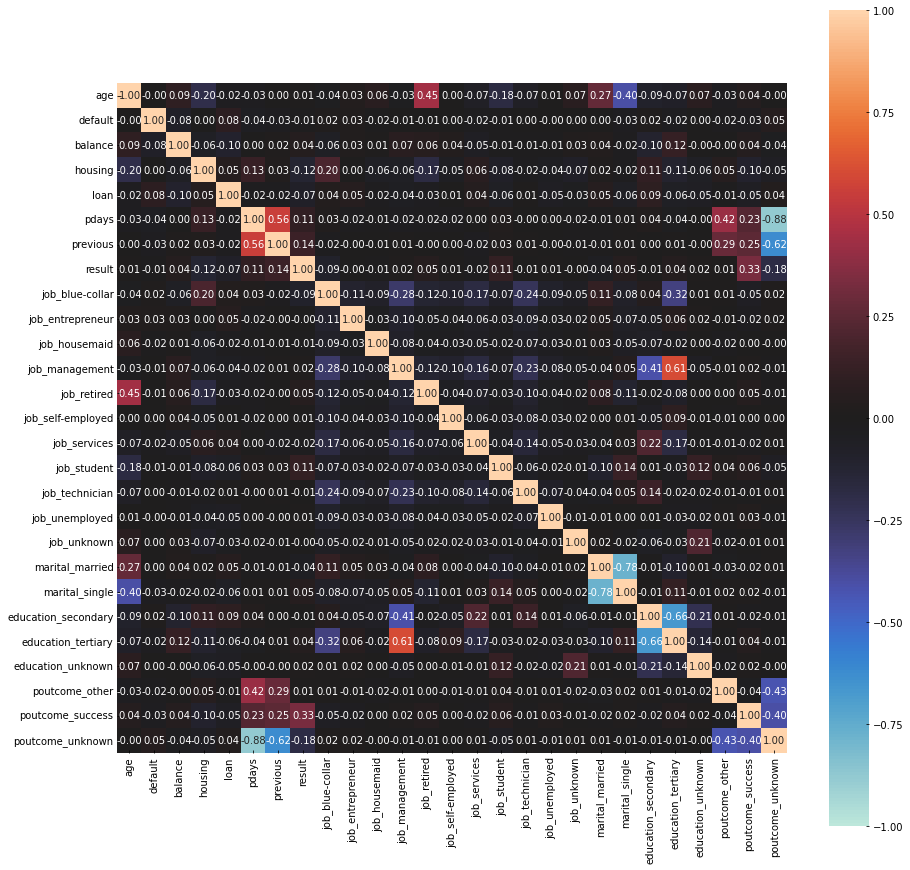

In [ ]:
sns.heatmap(train_cleaned.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

###モデルの作成

In [ ]:
x = train_cleaned.drop('result', axis=1).values
t = train_cleaned['result'].values
x_test =  test_cleaned.drop('result', axis=1).values
t_test = test_cleaned['result'].values

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
# モデルの学習
model.fit(x, t)

LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
# モデルの検証
print('train score : ', model.score(x, t))
print('test score : ', model.score(x_test, t_test))

train score :  0.6929551122194514
test score :  0.6874


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

####混同行列の作成

In [ ]:
from sklearn import metrics

In [ ]:
# 混同行列の作成
labels = list(set(t))
c_matrix = metrics.confusion_matrix(t_test, y_pred, labels=labels)

In [ ]:
df_matrix = pd.DataFrame(c_matrix, columns=labels, index=labels)
df_matrix

,0,1
0,9272,3970
1,719,1039


In [ ]:
recall = metrics.recall_score(t_test, y_pred)
recall

0.5910125142207053

###モデルから予測する

####特徴量変換

In [ ]:
pred_obj = pred.select_dtypes(include='object')
pred_obj_num = pred_obj.nunique()

In [ ]:
pred_cols = pred_obj_num[pred_obj_num==2].index
from sklearn.preprocessing import LabelEncoder
for col in pred_cols:
  le = LabelEncoder()
  le.fit(pred[col])
  pred[col] = le.transform(pred[col])

In [ ]:
pred = pd.get_dummies(pred, drop_first=True)

####予測の実行

In [ ]:
bank_pred = model.predict(pred)
bank_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# 推論結果を、 success, fail に書き換える
y_list = []
for y in bank_pred:
  if y == 0:
    f = 'fail'
    y_list.append(f)
  else:
    s = 'success'
    y_list.append(s)

In [ ]:
pd.Series(y_list, name='pred').to_csv('submission.csv', index=None, line_terminator='\n')